1. Градиентный спуск и его модификации
   - Выбрать [тестовые функции оптимизации](https://ru.wikipedia.org/wiki/Тестовые_функции_для_оптимизации) (2 шт)
   - Запрограммировать собственную реализацию классического градиентного спуска
   - Запрограммировать пайплайн тестирования алгоритма оптимизации
     - Визуализации функции и точки оптимума
     - Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
     - Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
   - Запрограммировать метод вычисления градиента
     - Передача функции градиента от пользователя
     - Символьное вычисление градиента (например с помощью [sympy](https://www.sympy.org/en/index.html)) (на доп балл)
     - Численная аппроксимация градиента (на доп балл)
   - Запрограммировать одну моментную модификацию и протестировать ее
   - Запрограммировать одну адаптивную модификацию и протестировать ее
   - Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их

Функция Била: $f(x,y) = (1.5 - x +xy)^2 + (2.25 - x +xy^2)^2 + (2.625 - x + xy^3)^2$

Функция Бута: $f(x,y) = (x + 2y - 7)^2 + (2x + y - 5)^2$

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Функция Бута

Классический градиентный спуск

In [2]:
# Функции частных производных
def grad_x(x,y):
  return 10 * x + 8 * y - 34
def grad_y(x,y):
  return 10 * y + 8 * x - 38

In [5]:
def gradient(x_0, y_0, lr, eps):
  h_x = []
  h_y = []
  while True:
    x = x_0 - lr * grad_x(x_0,y_0) # по каждой из осей двигаемся по антиграденту
    y = y_0 - lr * grad_y(x_0,y_0)
    if abs(x - x_0) < eps and abs(y - y_0) < eps: # условие выхода
      break
    else:
      x_0 = x
      y_0 = y
      h_x.append(x) # сохранение истории шагов
      h_y.append(y) # сохранение истории шагов
  return x,y,h_x,h_y

In [14]:
x_0 = random.uniform(-10, 10)
y_0 = random.uniform(-10, 10)
eps = 1e-6
x_opt, y_opt, h_x,h_y = gradient(x_0, y_0, 0.0001, eps)
print(x_opt, y_opt)

1.0049980672497842 2.9950019327502138


In [15]:
len(h_x)

36535

In [16]:
x_0, y_0

(6.486139271917544, -6.428958999095973)

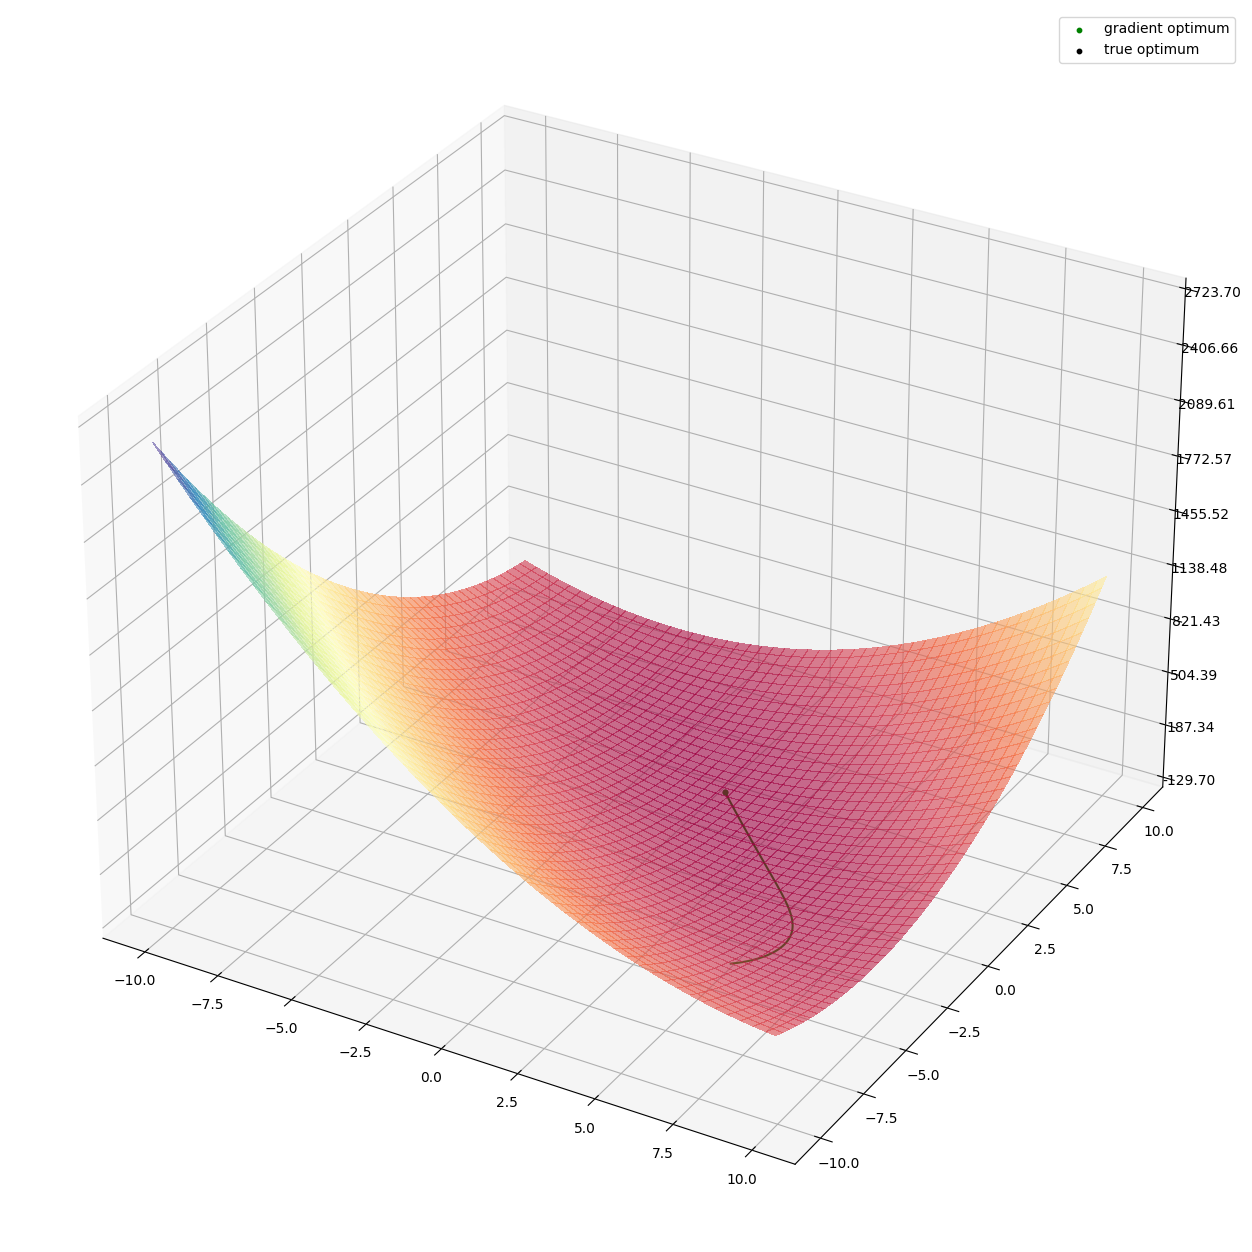

In [17]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У
x = y = np.arange(-10, 10, 0.1)
# Используем метод meshgrid для создания матрицы по массивам
x, y = np.meshgrid(x, y)
# Задаем нужную функцию z(x, y)
z = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

# Высчитываем точку оптимума
point_x = 1
point_y = 3
point_z = (point_x + 2 * point_y - 7) ** 2 + (2 * point_x + point_y - 5) ** 2

# Высчитываем точку оптимума которую нашел градиентный спуск
z_opt = (x_opt + 2 * y_opt -7) ** 2 + (2 * x_opt + y_opt - 5) ** 2

# Для построения истории спуска
h_x = np.array(h_x)
h_y = np.array(h_y)
h_z = (h_x + 2 * h_y - 7) ** 2 + (2* h_x + h_y - 5) ** 2

# Строим поверхность
surface = ax.plot_surface(x, y, z,cmap='Spectral', linewidth=0, antialiased=False,alpha=.6)
# Точка оптимума которую нашел градиент
ax.scatter(x_opt, y_opt, z_opt, color='green', s=10, label = 'gradient optimum')
# Истинное значение
ax.scatter(point_x, point_y, point_z, color='black', s=10, label = 'true optimum')

#  Строим историю спуска
ax.plot3D(h_x, h_y, h_z, 'green')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.legend()

Вычисление ошибки градиентного спуска

In [18]:
arr_opt_x = []
arr_opt_y = []
for i in range(1,30):
  x_0 = random.uniform(-10, 10)
  y_0 = random.uniform(-10, 10)
  eps = 1e-6
  x_opt, y_opt, h_x,h_y = gradient(x_0, y_0, 0.001, eps)
  arr_opt_x.append(x_opt)
  arr_opt_y.append(y_opt)
mean_squared_error(np.array([arr_opt_x,arr_opt_y]), np.array([len(arr_opt_y)*[1],len(arr_opt_x)*[3]]))

2.4842022634140343e-07

Momentum

In [19]:
def gradient_momentum(x_0, y_0, lr, beta, eps, window_size):
  h_x = [] # для сохранения истории спуска
  h_y = [] # для сохранения истории спуска
  accumulated_gradient_x = [] # для сохранения истории градиента
  accumulated_gradient_y = [] # для сохранения истории градиента
  while True:
    if len(accumulated_gradient_x) > 0: # условие выхода
      if abs(x - x_0) < eps and abs(y - y_0) < eps:
        break
      elif len(accumulated_gradient_x) < window_size:
        window_average_x = sum(accumulated_gradient_x) / len(accumulated_gradient_x) # среднее по значениям градиента
        window_average_y = sum(accumulated_gradient_y) / len(accumulated_gradient_y) # среднее по значениям градиента
        x_0 = x
        y_0 = y
      else:
        window_average_x = sum(accumulated_gradient_x[-window_size:]) / window_size # скользящее среднее по значениям градиента
        window_average_y = sum(accumulated_gradient_y[-window_size:]) / window_size # скользящее среднее по значениям градиента
        x_0 = x
        y_0 = y
      x = x_0 - lr * (grad_x(x_0,y_0) + beta * window_average_x) # Обновление координат
      y = y_0 - lr * (grad_y(x_0,y_0) + beta * window_average_y) # Обновление координат
      accumulated_gradient_x.append(grad_x(x_0,y_0)) # Сохранение градиента
      accumulated_gradient_y.append(grad_y(x_0,y_0)) # Сохранение градиента
      h_x.append(x)  # Сохранение координат
      h_y.append(y)  # Сохранение координат
    else: # для первого шага аналогично обычному градиенту
      x = x_0 - lr * (grad_x(x_0,y_0))
      y = y_0 - lr * (grad_y(x_0,y_0))
      accumulated_gradient_x.append(grad_x(x_0,y_0))
      accumulated_gradient_y.append(grad_y(x_0,y_0))
      h_x.append(x)
      h_y.append(y)
  return x,y,h_x,h_y

In [20]:
x_0 = random.uniform(-10, 10)
y_0 = random.uniform(-10, 10)
eps = 1e-6
x_opt, y_opt, h_x,h_y = gradient_momentum(x_0, y_0, 0.01, 0.3, eps, window_size = 10)
print(x_opt, y_opt)

0.9999643609263916 3.000035639073608


In [21]:
len(h_x)

433

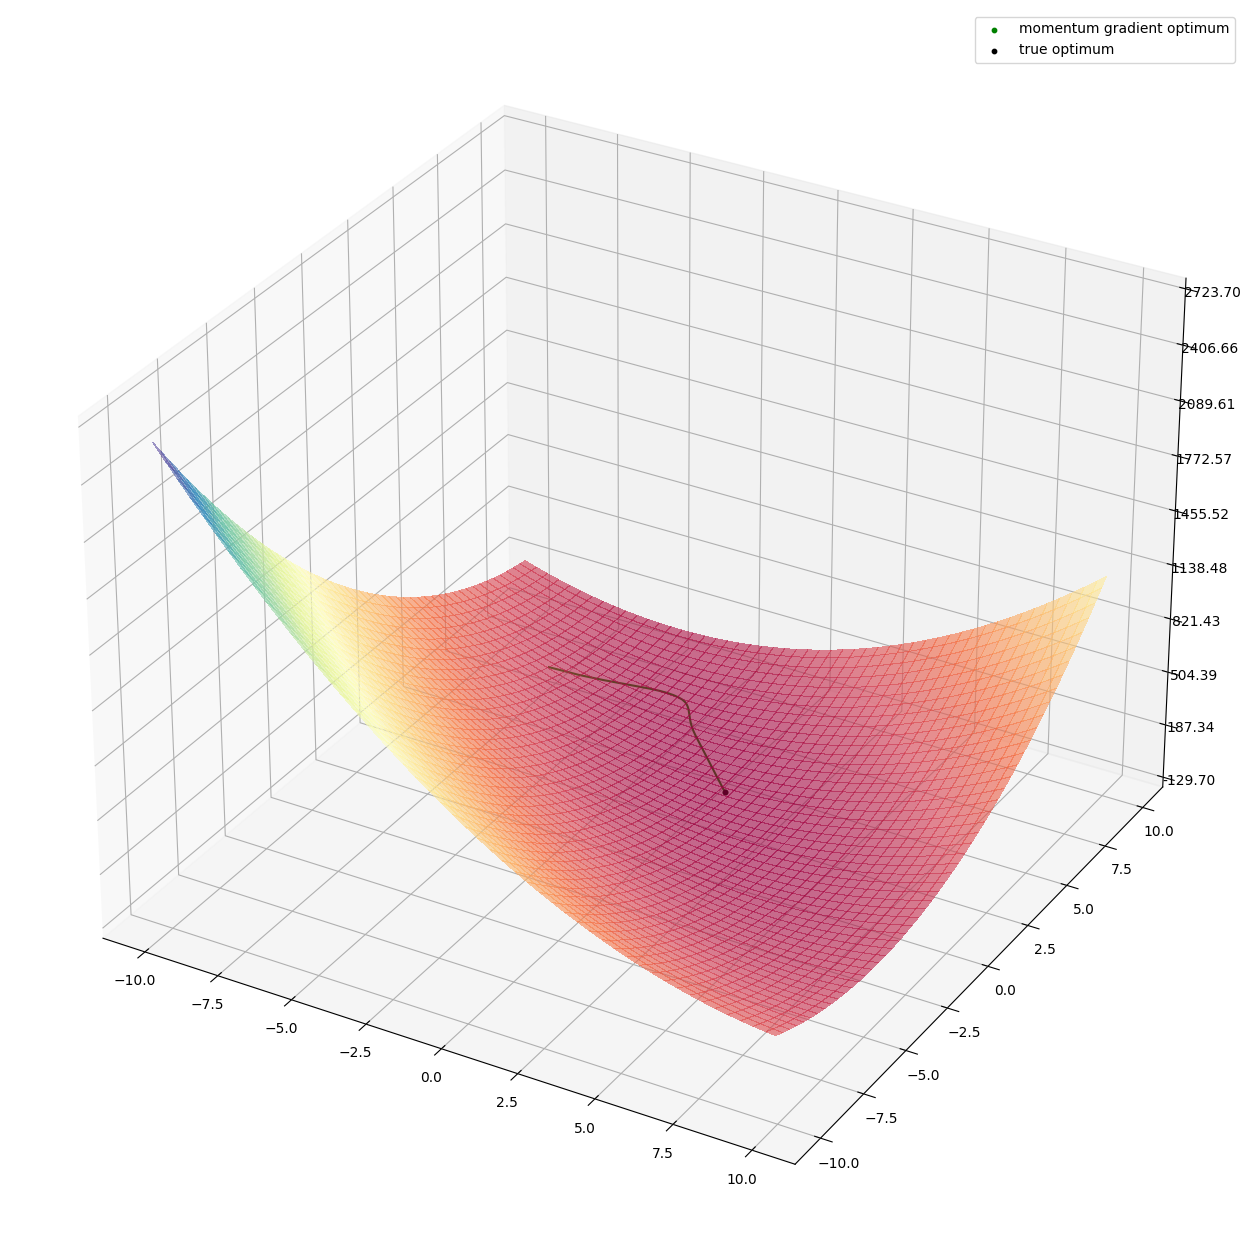

In [22]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У
x = y = np.arange(-10, 10, 0.1)
# Используем метод meshgrid для создания матрицы по массивам
x, y = np.meshgrid(x, y)
# Задаем нужную функцию z(x, y)
z = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) **2

# Высчитываем точку оптимума
point_x = 1
point_y = 3
point_z = (point_x + 2 * point_y - 7) ** 2 + (2 * point_x + point_y - 5) **2

# Высчитываем точку оптимума которую нашел градиентный спуск
z_opt = (x_opt + 2 * y_opt - 7) ** 2 + (2 * x_opt + y_opt - 5) ** 2

# Для построения истории спуска
h_x = np.array(h_x)
h_y = np.array(h_y)
h_z = (h_x + 2 * h_y - 7) ** 2 + (2 * h_x + h_y - 5) **2

# Строим поверхность
surface = ax.plot_surface(x, y, z,cmap='Spectral', linewidth=0, antialiased=False,alpha=.6)
# Точка оптимума которую нашел градиент
ax.scatter(x_opt, y_opt, z_opt, color='green', s=10, label = 'momentum gradient optimum')
# Истинное значение
ax.scatter(point_x, point_y, point_z, color='black', s=10, label = 'true optimum')

#  Строим историю спуска
ax.plot3D(h_x, h_y, h_z, 'green')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.legend()

Вычисление ошибки Momentum

In [23]:
arr_opt_x = []
arr_opt_y = []
for i in range(1,30):
  x_0 = random.uniform(-10, 10)
  y_0 = random.uniform(-10, 10)
  eps = 1e-6
  x_opt, y_opt, h_x,h_y = gradient_momentum(x_0, y_0, 0.01, 0.3, eps, window_size = 10)
  arr_opt_x.append(x_opt)
  arr_opt_y.append(y_opt)
mean_squared_error(np.array([arr_opt_x,arr_opt_y]), np.array([len(arr_opt_y)*[1],len(arr_opt_x)*[3]]))

1.2645372281743139e-09

Adagrad

In [24]:
def adagrad(x_0, y_0, lr, eps):
    s_x = 0
    s_y = 0
    h_x = [] # для сохранения истории спуска
    h_y = [] # для сохранения истории спуска
    while True:
      s_x = s_x + grad_x(x_0,y_0)**2 # накопление градиента
      s_y = s_y + grad_y(x_0,y_0)**2 # накопление градиента
      x = x_0 - (lr / (s_x + 1e-8)**0.5) * grad_x(x_0,y_0) # по каждой из осей двигаемся по антиграденту
      y = y_0 - (lr / (s_y + 1e-8)**0.5) * grad_y(x_0,y_0) # по каждой из осей двигаемся по антиграденту
      if abs(x-x_0) < eps and abs(y-y_0) < eps: # условие выхода
        break
      else:
        x_0 = x
        y_0 = y
        h_x.append(x) # сохранение истории шагов
        h_y.append(y) # сохранение истории шагов
    return  x,y,h_x,h_y

In [25]:
x_0 = random.uniform(-10, 10)
y_0 = random.uniform(-10, 10)
eps = 1e-7
x_opt, y_opt, h_x, h_y = adagrad(x_0, y_0, 0.01, eps)
print(x_opt, y_opt)

0.9462016709251798 3.0524414732491785


In [26]:
len(h_x)

1948848

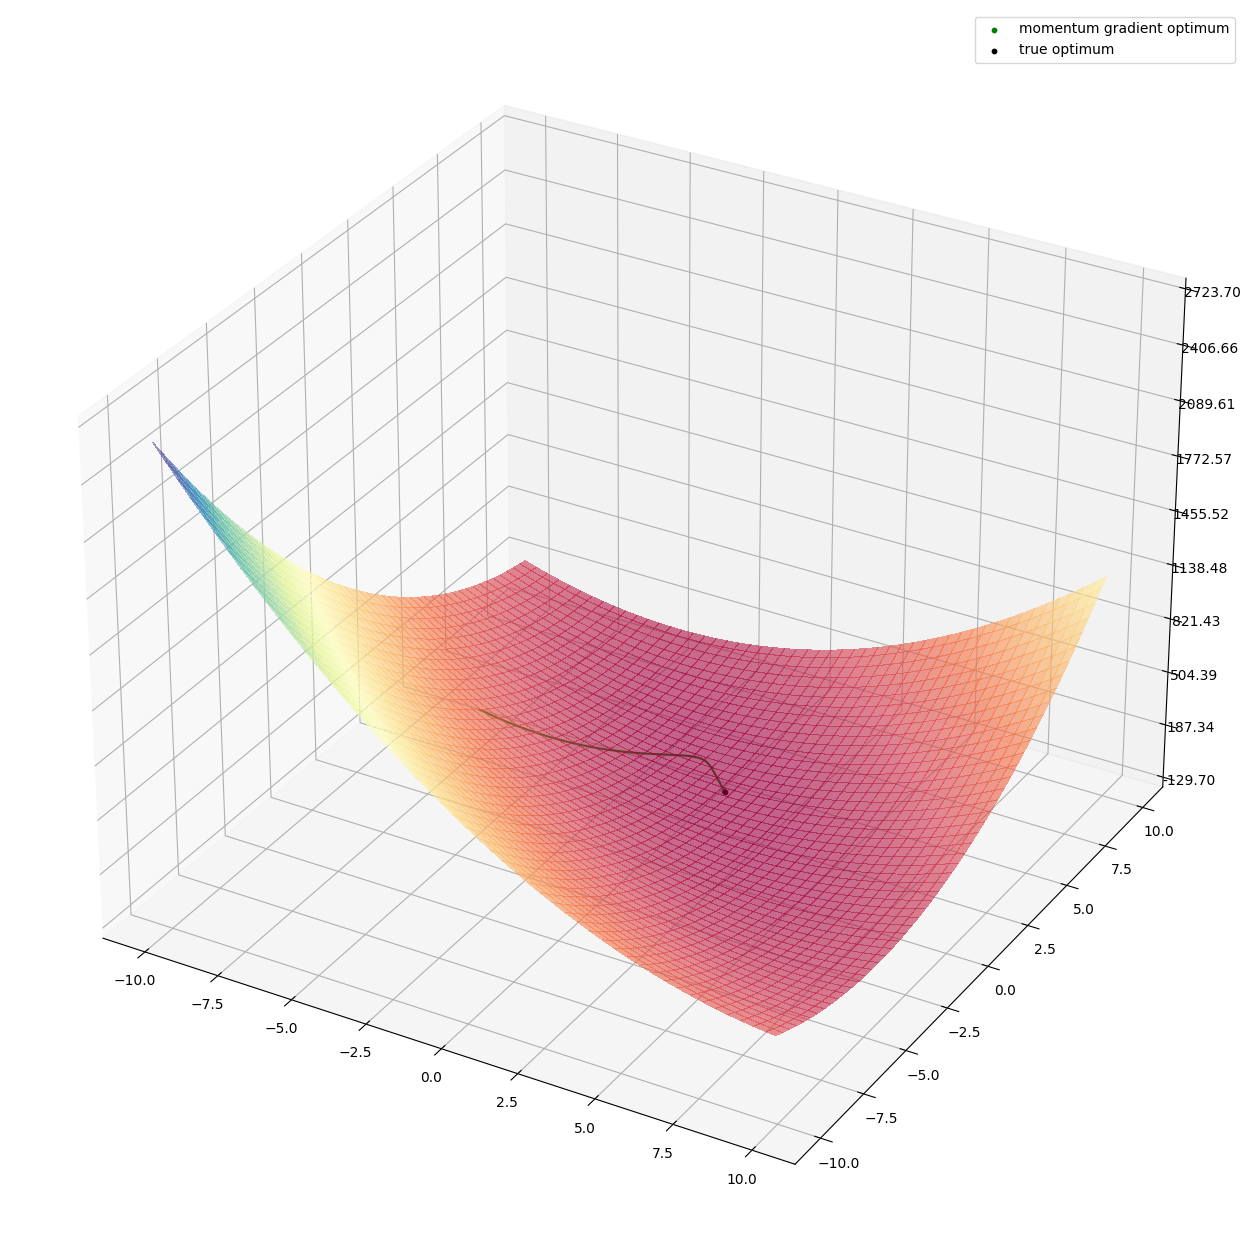

In [27]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У
x = y = np.arange(-10, 10, 0.1)
# Используем метод meshgrid для создания матрицы по массивам
x, y = np.meshgrid(x, y)
# Задаем нужную функцию z(x, y)
z = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) **2

# Высчитываем точку оптимума
point_x = 1
point_y = 3
point_z = (point_x + 2 * point_y - 7) ** 2 + (2 * point_x + point_y - 5) **2

# Высчитываем точку оптимума которую нашел градиентный спуск
z_opt = (x_opt + 2 * y_opt - 7) ** 2 +(2 * x_opt + y_opt - 5) **2

# Для построения истории спуска
h_x = np.array(h_x)
h_y = np.array(h_y)
h_z = (h_x + 2 * h_y - 7) ** 2 + (2 * h_x + h_y - 5) ** 2

# Строим поверхность
surface = ax.plot_surface(x, y, z,cmap='Spectral', linewidth=0, antialiased=False,alpha=.6)
# Точка оптимума которую нашел градиент
ax.scatter(x_opt, y_opt, z_opt, color='green', s=10, label = 'momentum gradient optimum')
# Истинное значение
ax.scatter(point_x, point_y, point_z, color='black', s=10, label = 'true optimum')

#  Строим историю спуска
ax.plot3D(h_x, h_y, h_z, 'green')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.legend()

Вычисление ошибки Adagrad

In [28]:
arr_opt_x = []
arr_opt_y = []
for i in range(1,10):
  x_0 = random.uniform(-10, 10)
  y_0 = random.uniform(-10, 10)
  eps = 1e-7
  x_opt, y_opt, h_x, h_y = adagrad(x_0, y_0, 0.01, eps)
  arr_opt_x.append(x_opt)
  arr_opt_y.append(y_opt)
mean_squared_error(np.array([arr_opt_x,arr_opt_y]), np.array([len(arr_opt_y)*[1],len(arr_opt_x)*[3]]))

0.008128461962770075

RMSProp

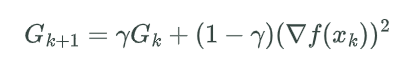

In [31]:
def RMSprop(x_0, y_0, lr, eps,gamma):
    s_x = 0
    s_y = 0
    h_x = [] # для сохранения истории спуска
    h_y = [] # для сохранения истории спуска
    while True:
      s_x = s_x * gamma + (1 - gamma) * grad_x(x_0,y_0) ** 2 # накопление градиента
      s_y = s_y * gamma + (1 - gamma) * grad_y(x_0,y_0) ** 2 # накопление градиента
      x = x_0 - (lr / (s_x + 1e-8)**0.5) * grad_x(x_0,y_0) # по каждой из осей двигаемся по антиграденту
      y = y_0 - (lr / (s_y + 1e-8)**0.5) * grad_y(x_0,y_0) # по каждой из осей двигаемся по антиграденту
      if abs(x - x_0) < eps and abs(y - y_0) < eps or (len(h_x) > 200000): # условие выхода
        break
      else:
        x_0 = x
        y_0 = y
        h_x.append(x) # сохранение истории шагов
        h_y.append(y) # сохранение истории шагов
    return  x,y,h_x,h_y

In [32]:
x_0 = random.uniform(-10, 10)
y_0 = random.uniform(-10, 10)
eps = 1e-4
x_opt, y_opt, h_x, h_y = RMSprop(x_0, y_0, 0.001, eps,gamma = 0.3)
print(x_opt, y_opt)

1.00049996913485 3.0004999691348493


In [33]:
len(h_x)

200001

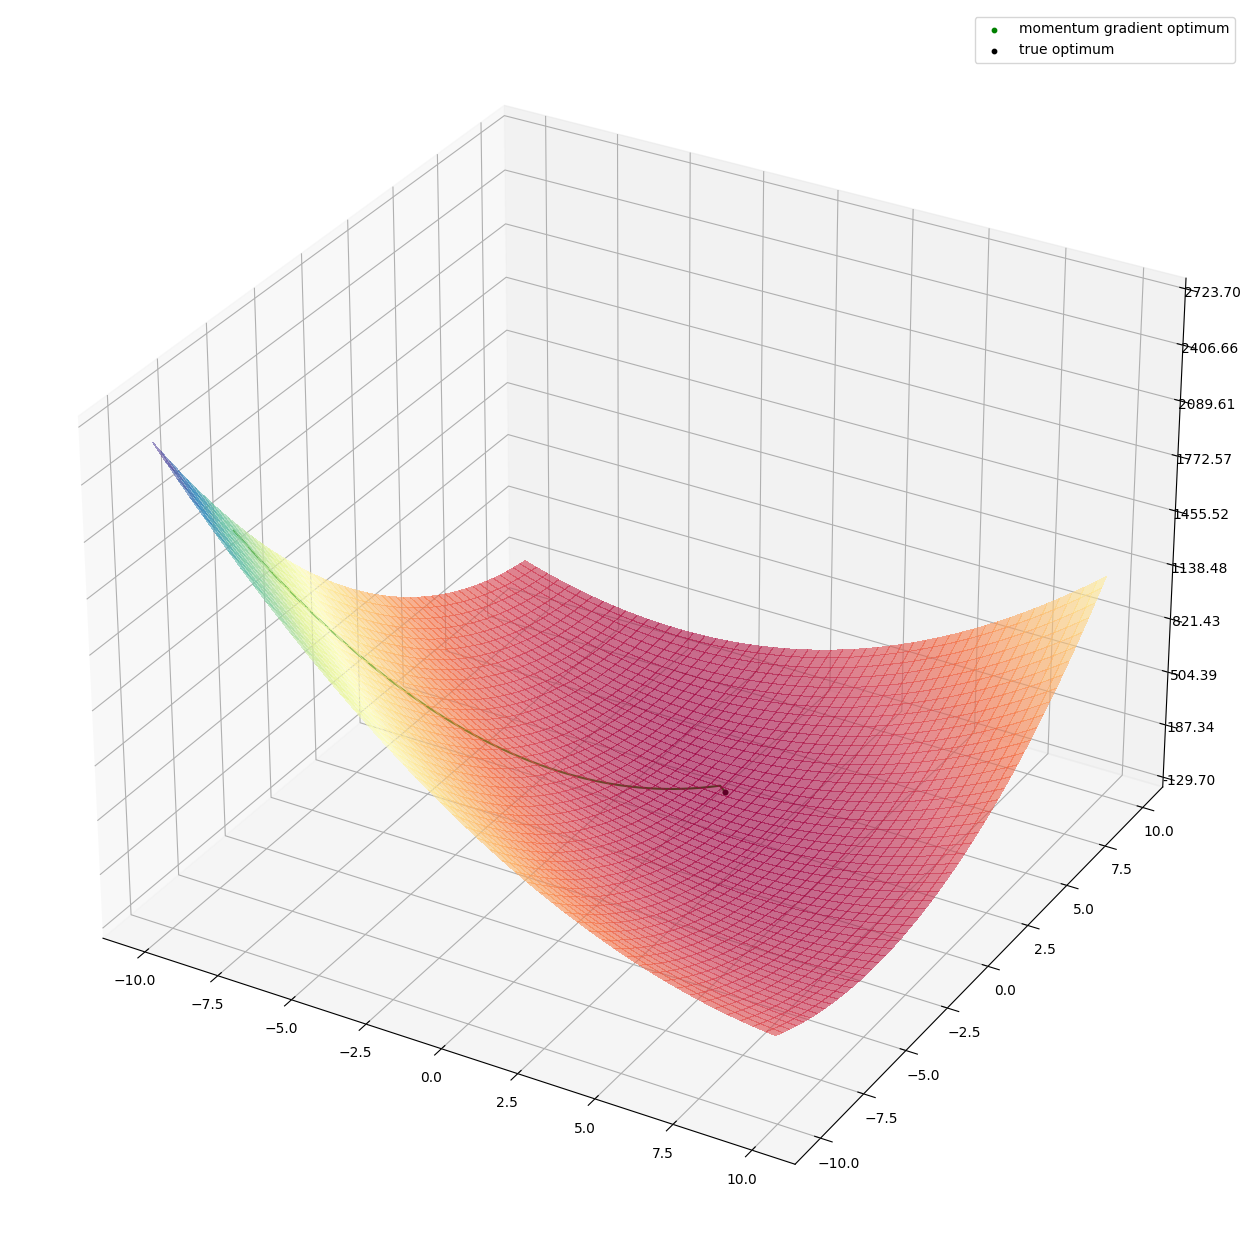

In [34]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У
x = y = np.arange(-10, 10, 0.1)
# Используем метод meshgrid для создания матрицы по массивам
x, y = np.meshgrid(x, y)
# Задаем нужную функцию z(x, y)
z = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

# Высчитываем точку оптимума
point_x = 1
point_y = 3
point_z = (point_x + 2 * point_y - 7) ** 2 + (2 * point_x + point_y - 5) ** 2

# Высчитываем точку оптимума которую нашел градиентный спуск
z_opt = (x_opt + 2 * y_opt - 7) ** 2 + (2 * x_opt + y_opt - 5) ** 2

# Для построения истории спуска
h_x = np.array(h_x)
h_y = np.array(h_y)
h_z = (h_x + 2 * h_y - 7) ** 2 + (2 * h_x + h_y - 5) **2

# Строим поверхность
surface = ax.plot_surface(x, y, z,cmap='Spectral', linewidth=0, antialiased=False,alpha=.6)
# Точка оптимума которую нашел градиент
ax.scatter(x_opt, y_opt, z_opt, color='green', s=10, label = 'momentum gradient optimum')
# Истинное значение
ax.scatter(point_x, point_y, point_z, color='black', s=10, label = 'true optimum')

#  Строим историю спуска
ax.plot3D(h_x, h_y, h_z, 'green')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.legend()

Вычисление ошибки RMSProp

In [35]:
arr_opt_x = []
arr_opt_y = []
for i in range(1,30):
  x_0 = random.uniform(-10, 10)
  y_0 = random.uniform(-10, 10)
  eps = 1e-4
  x_opt, y_opt, h_x, h_y = RMSprop(x_0, y_0, 0.001, eps,gamma = 0.3)
  arr_opt_x.append(x_opt)
  arr_opt_y.append(y_opt)
mean_squared_error(np.array([arr_opt_x,arr_opt_y]), np.array([len(arr_opt_y)*[1],len(arr_opt_x)*[3]]))

2.499691358024196e-07

Функция Била

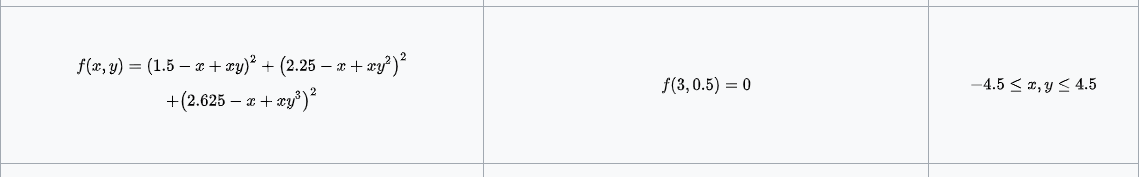

Символьное вычисление градиента

In [36]:
from sympy import *

x_s, y_s = symbols('x, y')

f = (1.5 - x_s + x_s * y_s) ** 2 +( 2.25 - x_s + x_s * (y_s ** 2)) ** 2 + ( 2.625 - x_s + x_s * ( y_s ** 3) ) ** 2

Df = Matrix([f]).jacobian(Matrix(list(f.free_symbols)))
print(Df[0])
print(Df[1])

15.75*x*y**2*(0.380952380952381*x*y**3 - 0.380952380952381*x + 1) + 9.0*x*y*(0.444444444444444*x*y**2 - 0.444444444444444*x + 1) + 3.0*x*(0.666666666666667*x*y - 0.666666666666667*x + 1)
2.25*(1.33333333333333*y - 1.33333333333333)*(0.666666666666667*x*y - 0.666666666666667*x + 1) + 5.0625*(0.888888888888889*y**2 - 0.888888888888889)*(0.444444444444444*x*y**2 - 0.444444444444444*x + 1) + 6.890625*(0.761904761904762*y**3 - 0.761904761904762)*(0.380952380952381*x*y**3 - 0.380952380952381*x + 1)


In [37]:
x_s

x

Классический градиентный спуск

In [38]:
print(Df[0])

15.75*x*y**2*(0.380952380952381*x*y**3 - 0.380952380952381*x + 1) + 9.0*x*y*(0.444444444444444*x*y**2 - 0.444444444444444*x + 1) + 3.0*x*(0.666666666666667*x*y - 0.666666666666667*x + 1)


In [39]:
Df[0]

15.75*x*y**2*(0.380952380952381*x*y**3 - 0.380952380952381*x + 1) + 9.0*x*y*(0.444444444444444*x*y**2 - 0.444444444444444*x + 1) + 3.0*x*(0.666666666666667*x*y - 0.666666666666667*x + 1)

In [42]:
# Функции частных производных
def grad_x(x,y):
  return 6 * x - 2 * x * (y ** 2) - 12.75 + 3 * y - 4 * x * y + 2 * x * (y ** 4) + 4.5 * (y ** 2) + 2 * x * (y ** 6) + 5.25 * (y ** 3) - 4 * x * (y ** 3)
def grad_y(x,y):
  return -2 * (x ** 2) * y + 3 * x - 2 * (x ** 2) + 4 * (x ** 2) * (y ** 3) + 9 * x * y + 6 * (x ** 2) * (y ** 5) + (15.75) * x * (y ** 2) - 6 * (x ** 2) * (y ** 2)

In [44]:
def gradient(x_0, y_0, lr, eps):
  h_x = []
  h_y = []
  while True:
    x = x_0 - lr * grad_x(x_0, y_0) # по каждой из осей двигаемся по антиграденту
    y = y_0 - lr * grad_y(x_0, y_0)
    if (abs(x-x_0) < eps and abs(y-y_0) < eps): # условие выхода
      break
    else:
      x_0 = x
      y_0 = y
      h_x.append(x) # сохранение истории шагов
      h_y.append(y) # сохранение истории шагов
  return x,y,h_x,h_y

In [53]:
x_0 = random.uniform(-4.5, 4.5)
y_0 = random.uniform(-4.5, 4.5)
print(x_0,y_0)
eps = 1e-6
x_opt, y_opt, h_x,h_y = gradient(x_0, y_0, 0.0001, eps)
print(x_opt, y_opt)

3.180067591405056 3.673062589079496
2.968436083133185 0.4920123194914044


In [54]:
len(h_x)

82061

In [55]:
x_opt

2.968436083133185

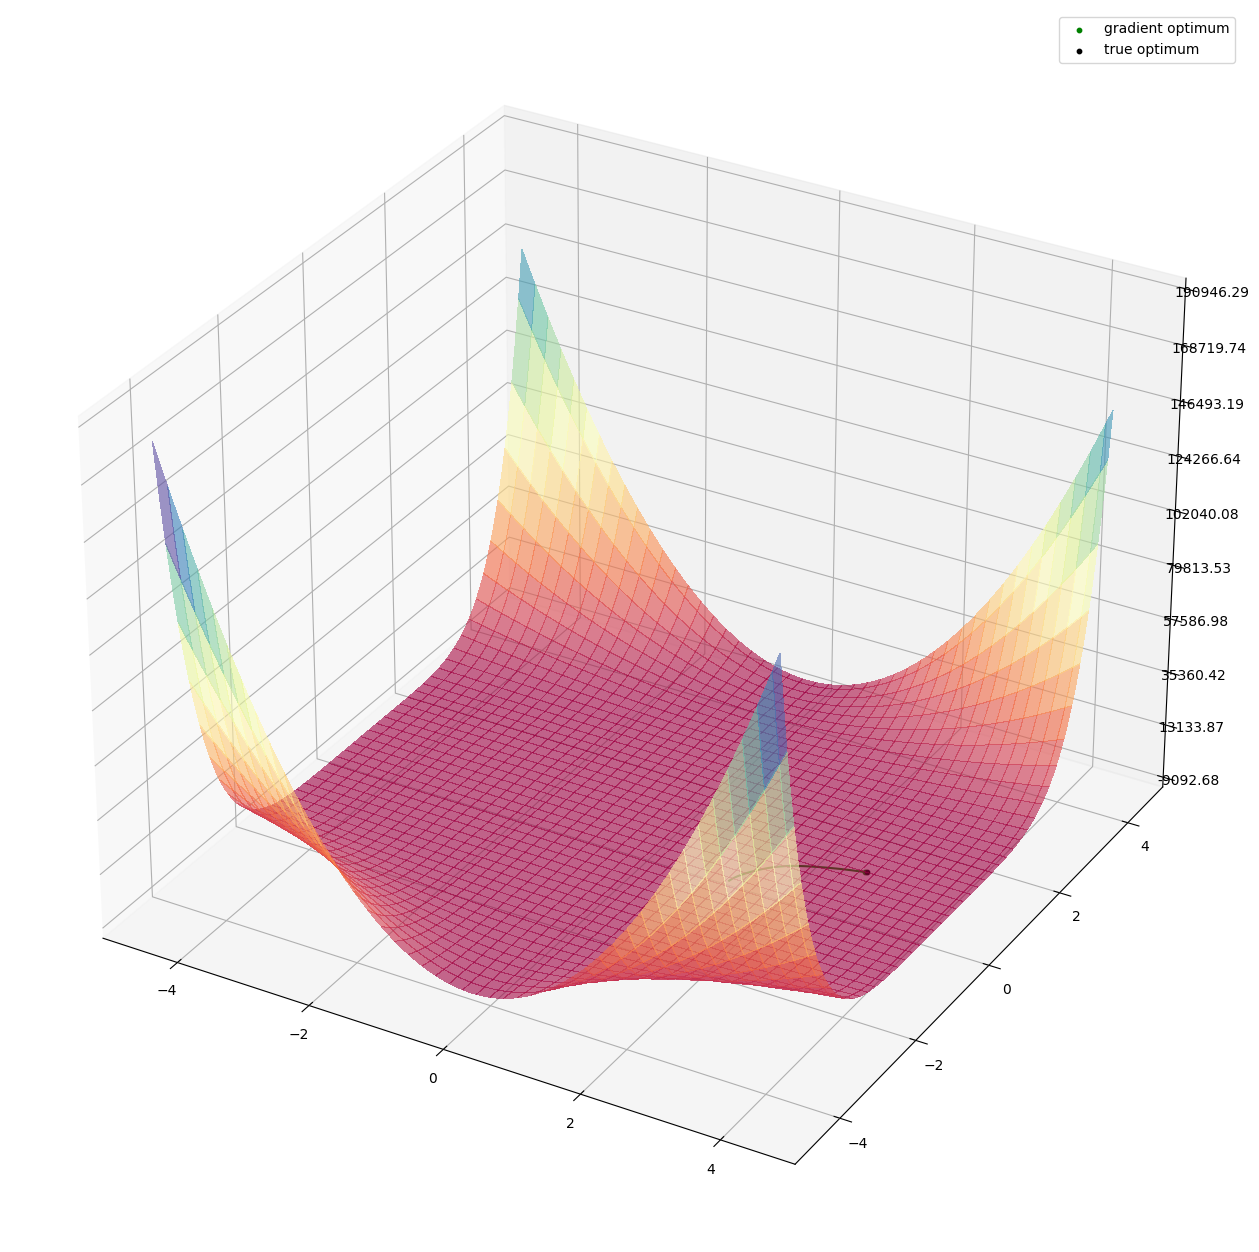

In [56]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У
x = y = np.arange(-4.5, 4.5, 0.1)
# Используем метод meshgrid для создания матрицы по массивам
x, y = np.meshgrid(x, y)
# Задаем нужную функцию z(x, y)
z = (1.5-x+x*y)**2 +(2.25-x+x*(y**2))**2 +(2.625-x+x*(y**3))**2

# Высчитываем точку оптимума
point_x = 3
point_y = 0.5
point_z = (1.5-point_x+point_x*point_y)**2 +(2.25-point_x+point_x*(point_y**2))**2 +(2.625-point_x+point_x*(point_y**3))**2

# Высчитываем точку оптимума которую нашел градиентный спуск
z_opt = (1.5-x_opt+x_opt*y_opt)**2 +(2.25-x_opt+x_opt*(y_opt**2))**2 +(2.625-x_opt+x_opt*(y_opt**3))**2

# Для построения истории спуска
h_x = np.array(h_x)
h_y = np.array(h_y)
h_z = (1.5-h_x+h_x*h_y)**2 +(2.25-h_x+h_x*(h_y**2))**2 +(2.625-h_x+h_x*(h_y**3))**2

# Строим поверхность
surface = ax.plot_surface(x, y, z,cmap='Spectral', linewidth=0, antialiased=False,alpha=.6)
# Точка оптимума которую нашел градиент
ax.scatter(x_opt, y_opt, z_opt, color='green', s=10, label = 'gradient optimum')
# Истинное значение
ax.scatter(point_x, point_y, point_z, color='black', s=10, label = 'true optimum')

#  Строим историю спуска
ax.plot3D(h_x, h_y, h_z, 'green')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.legend()

Вычисление ошибки градиентного спуска

In [57]:
arr_opt_x = []
arr_opt_y = []
for i in range(1,3):
  x_0 = random.uniform(-4.5, 4.5)
  y_0 = random.uniform(-4.5, 4.5)
  eps = 1e-6
  x_opt, y_opt, h_x,h_y = gradient(x_0, y_0, 0.0001, eps)
  arr_opt_x.append(x_opt)
  arr_opt_y.append(y_opt)
mean_squared_error(np.array([arr_opt_x,arr_opt_y]), np.array([len(arr_opt_y)*[3],len(arr_opt_x)*[0.5]]))

55.93354445473618

Momentum

In [50]:
x_0 = random.uniform(-4.5, 4.5)
y_0 = random.uniform(-4.5, 4.5)
eps = 1e-7
x_opt, y_opt, h_x,h_y = gradient_momentum(x_0, y_0, 0.001, 0.3, eps, window_size = 10)
print(x_opt, y_opt)

3.000254968909715 0.5000636328646525


In [51]:
len(h_x)

24159

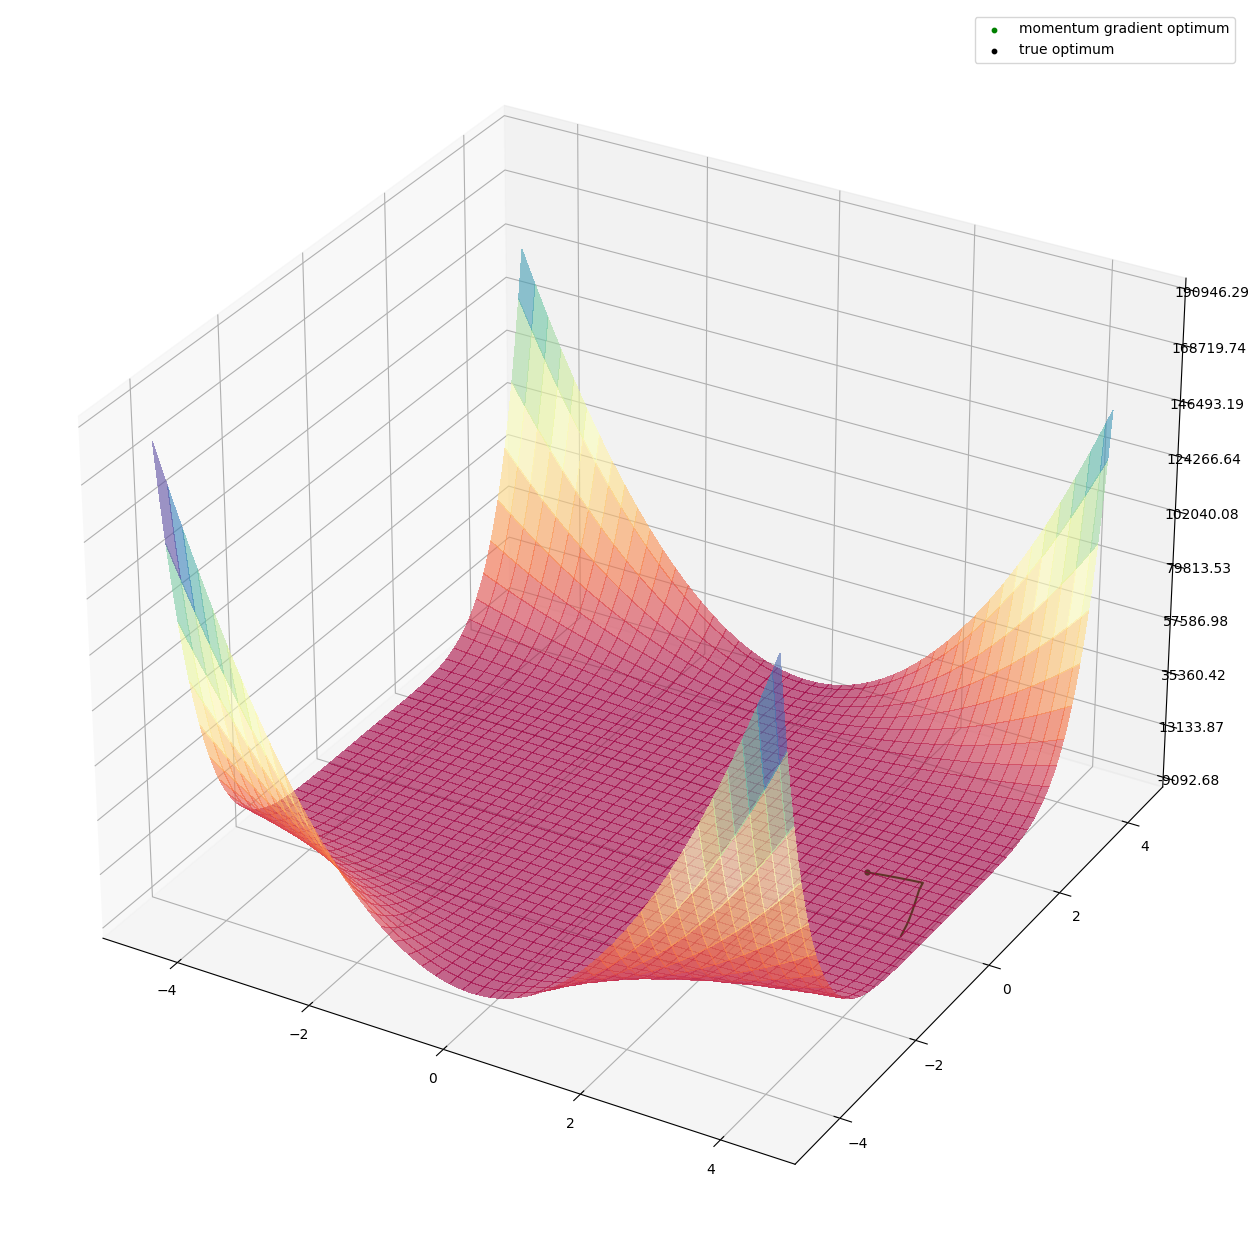

In [52]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У
x = y = np.arange(-4.5, 4.5, 0.1)
# Используем метод meshgrid для создания матрицы по массивам
x, y = np.meshgrid(x, y)
# Задаем нужную функцию z(x, y)
z = (1.5-x+x*y)**2 +(2.25-x+x*(y**2))**2 +(2.625-x+x*(y**3))**2

# Высчитываем точку оптимума
point_x = 3
point_y = 0.5
point_z = (1.5-point_x+point_x*point_y)**2 +(2.25-point_x+point_x*(point_y**2))**2 +(2.625-point_x+point_x*(point_y**3))**2

# Высчитываем точку оптимума которую нашел градиентный спуск
z_opt = (1.5-x_opt+x_opt*y_opt)**2 +(2.25-x_opt+x_opt*(y_opt**2))**2 +(2.625-x_opt+x_opt*(y_opt**3))**2

# Для построения истории спуска
h_x = np.array(h_x)
h_y = np.array(h_y)
h_z = (1.5-h_x+h_x*h_y)**2 +(2.25-h_x+h_x*(h_y**2))**2 +(2.625-h_x+h_x*(h_y**3))**2

# Строим поверхность
surface = ax.plot_surface(x, y, z,cmap='Spectral', linewidth=0, antialiased=False,alpha=.6)
# Точка оптимума которую нашел градиент
ax.scatter(x_opt, y_opt, z_opt, color='green', s=10, label = 'momentum gradient optimum')
# Истинное значение
ax.scatter(point_x, point_y, point_z, color='black', s=10, label = 'true optimum')

#  Строим историю спуска
ax.plot3D(h_x, h_y, h_z, 'green')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.legend()

Вычисление ошибки momentum

In [60]:
arr_opt_x = []
arr_opt_y = []
for i in range(1,3):
  x_0 = random.uniform(-4.5, 4.5)
  y_0 = random.uniform(-4.5, 4.5)
  eps = 1e-7
  x_opt, y_opt, h_x,h_y = gradient_momentum(x_0, y_0, 0.0001, 0.3, eps, window_size = 10)
  arr_opt_x.append(x_opt)
  arr_opt_y.append(y_opt)
mean_squared_error(np.array([arr_opt_x,arr_opt_y]), np.array([len(arr_opt_y)*[3],len(arr_opt_x)*[0.5]]))

3.430555769610169e-06

RMSProp

In [61]:
def RMSprop(x_0, y_0, lr, eps,gamma):
    s_x = 0
    s_y = 0
    h_x = [] # для сохранения истории спуска
    h_y = [] # для сохранения истории спуска
    while True:
      s_x = s_x * gamma + (1 - gamma) * grad_x(x_0,y_0) ** 2 # накопленный градиент
      s_y = s_y * gamma + (1 - gamma) * grad_y(x_0,y_0) ** 2 # накопленный градиент
      x = x_0 - (lr / (s_x + 1e-8)**0.5) * grad_x(x_0,y_0) # по каждой из осей двигаемся по антиграденту
      y = y_0 - (lr / (s_y + 1e-8)**0.5) * grad_y(x_0,y_0) # по каждой из осей двигаемся по антиграденту
      if abs(x - x_0) < eps and abs(y - y_0) < eps or (len(h_x) > 500000): # условие выхода
        break
      else:
        x_0 = x
        y_0 = y
        h_x.append(x) # сохранение истории шагов
        h_y.append(y) # сохранение истории шагов
    return  x,y,h_x,h_y

In [62]:
x_0 = 0 #random.uniform(-4.5, 4.5)
y_0 = 0 #random.uniform(-4.5, 4.5)
eps = 1e-4
x_opt, y_opt, h_x, h_y = RMSprop(x_0, y_0, 0.001, eps,gamma = 0.7)
print(x_opt, y_opt)

3.0004713369618212 0.4994923383119652


In [63]:
len(h_x)

500001

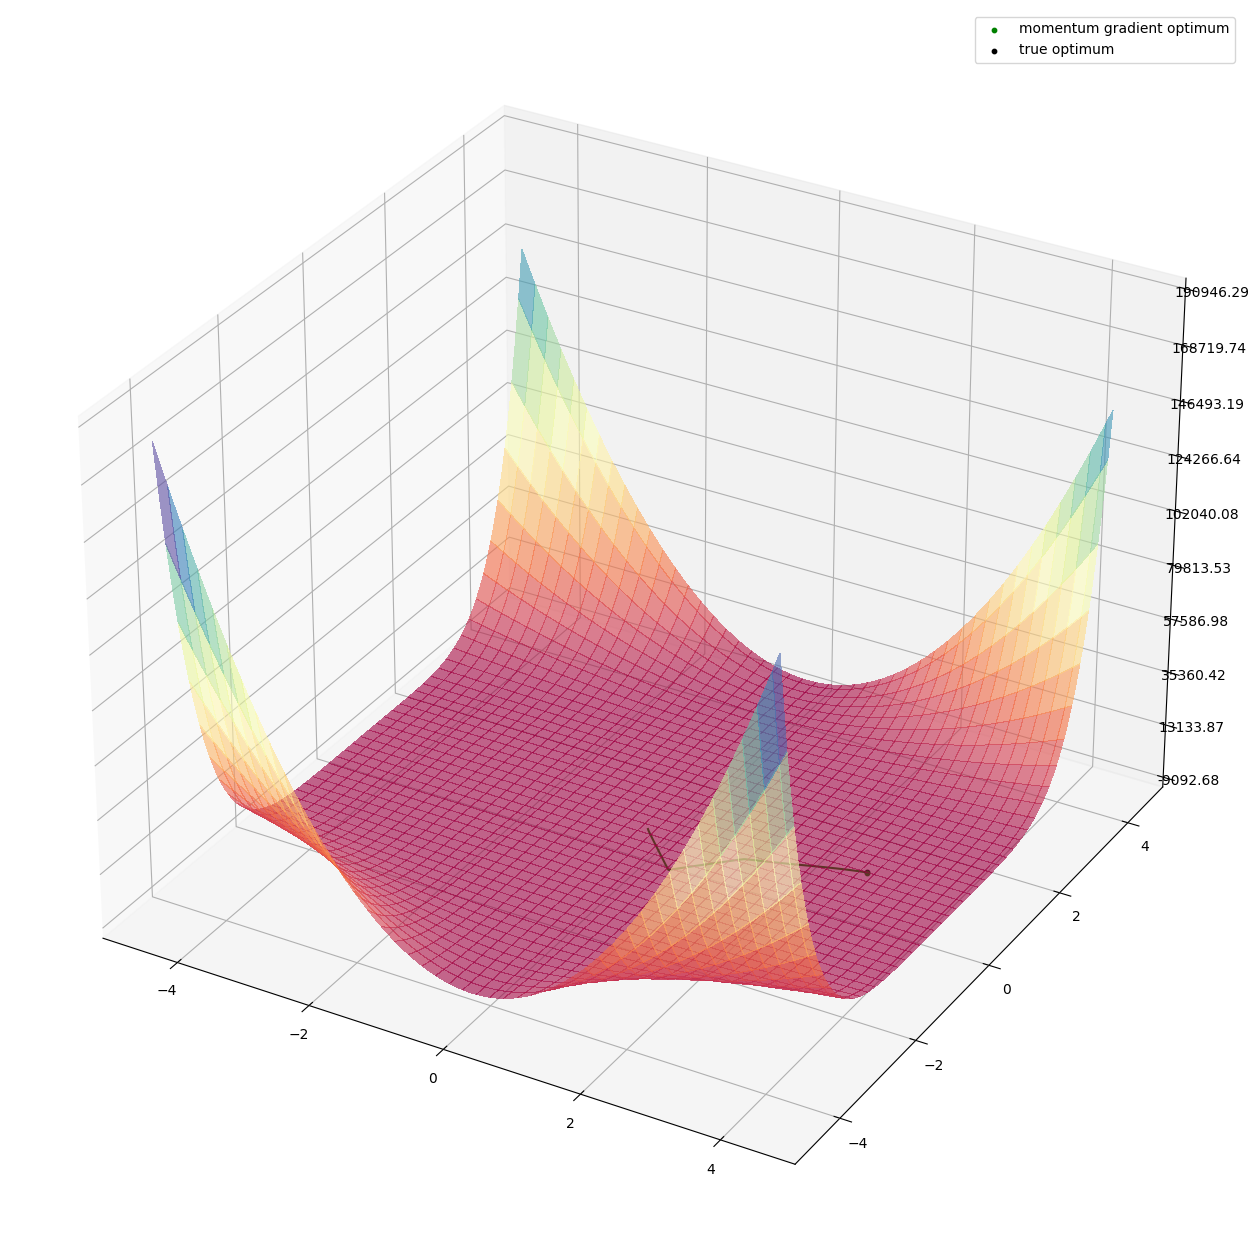

In [64]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У
x = y = np.arange(-4.5, 4.5, 0.1)
# Используем метод meshgrid для создания матрицы по массивам
x, y = np.meshgrid(x, y)
# Задаем нужную функцию z(x, y)
z = (1.5-x+x*y)**2 +(2.25-x+x*(y**2))**2 +(2.625-x+x*(y**3))**2

# Высчитываем точку оптимума
point_x = 3
point_y = 0.5
point_z = (1.5-point_x+point_x*point_y)**2 +(2.25-point_x+point_x*(point_y**2))**2 +(2.625-point_x+point_x*(point_y**3))**2

# Высчитываем точку оптимума которую нашел градиентный спуск
z_opt = (1.5-x_opt+x_opt*y_opt)**2 +(2.25-x_opt+x_opt*(y_opt**2))**2 +(2.625-x_opt+x_opt*(y_opt**3))**2

# Для построения истории спуска
h_x = np.array(h_x)
h_y = np.array(h_y)
h_z = (1.5-h_x+h_x*h_y)**2 +(2.25-h_x+h_x*(h_y**2))**2 +(2.625-h_x+h_x*(h_y**3))**2

# Строим поверхность
surface = ax.plot_surface(x, y, z,cmap='Spectral', linewidth=0, antialiased=False,alpha=.6)
# Точка оптимума которую нашел градиент
ax.scatter(x_opt, y_opt, z_opt, color='green', s=10, label = 'momentum gradient optimum')
# Истинное значение
ax.scatter(point_x, point_y, point_z, color='black', s=10, label = 'true optimum')

#  Строим историю спуска
ax.plot3D(h_x, h_y, h_z, 'green')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.legend()

Вычисление ошибки RMSProp

In [67]:
arr_opt_x = []
arr_opt_y = []
for i in range(1,5):
  x_0 = random.uniform(-4.5, 4.5)
  y_0 = random.uniform(-4.5, 4.5)
  eps = 1e-6
  x_opt, y_opt, h_x, h_y = RMSprop(x_0, y_0, 0.001, eps,gamma = 0.3)
  arr_opt_x.append(x_opt)
  arr_opt_y.append(y_opt)
mean_squared_error(np.array([arr_opt_x,arr_opt_y]), np.array([len(arr_opt_y)*[3],len(arr_opt_x)*[0.5]]))

2.5565101644957594e-07

Adagrad

In [68]:
x_0 = random.uniform(-4.5, 4.5)
y_0 = random.uniform(-4.5, 4.5)
eps = 1e-7
x_opt, y_opt, h_x, h_y = adagrad(x_0, y_0, 0.1, eps)
print(x_opt, y_opt)

2.9998464520856447 0.4999619101783658


In [71]:
len(h_x)

11805

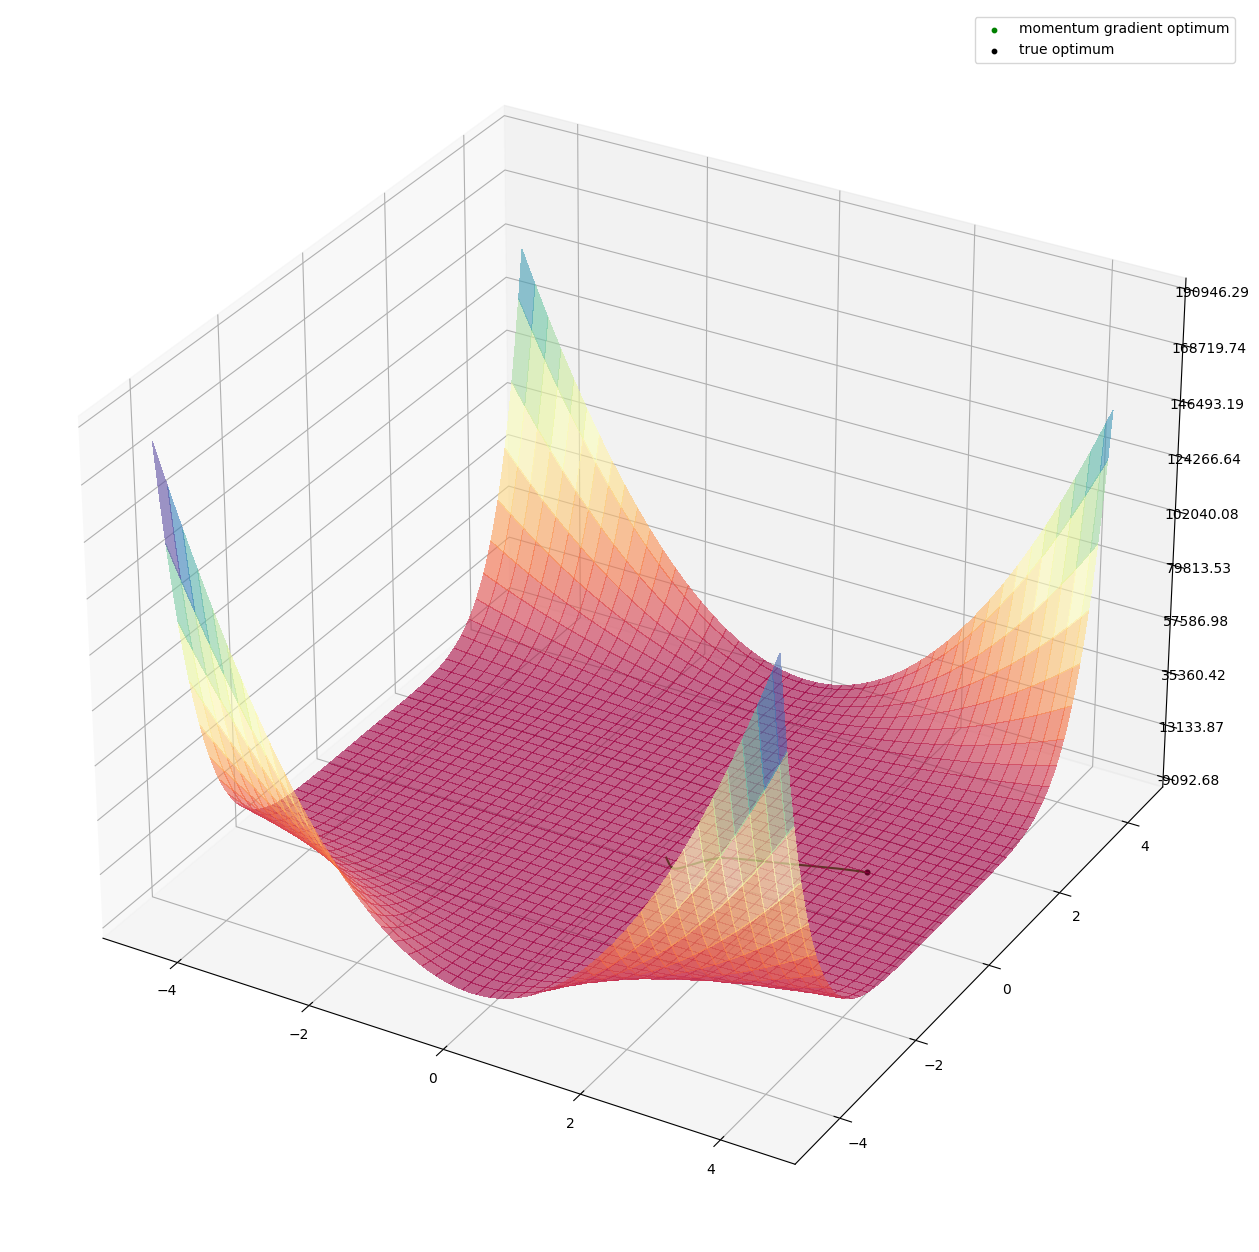

In [72]:
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У
x = y = np.arange(-4.5, 4.5, 0.1)
# Используем метод meshgrid для создания матрицы по массивам
x, y = np.meshgrid(x, y)
# Задаем нужную функцию z(x, y)
z = (1.5-x+x*y)**2 +(2.25-x+x*(y**2))**2 +(2.625-x+x*(y**3))**2

# Высчитываем точку оптимума
point_x = 3
point_y = 0.5
point_z = (1.5-point_x+point_x*point_y)**2 +(2.25-point_x+point_x*(point_y**2))**2 +(2.625-point_x+point_x*(point_y**3))**2

# Высчитываем точку оптимума которую нашел градиентный спуск
z_opt = (1.5-x_opt+x_opt*y_opt)**2 +(2.25-x_opt+x_opt*(y_opt**2))**2 +(2.625-x_opt+x_opt*(y_opt**3))**2

# Для построения истории спуска
h_x = np.array(h_x)
h_y = np.array(h_y)
h_z = (1.5-h_x+h_x*h_y)**2 +(2.25-h_x+h_x*(h_y**2))**2 +(2.625-h_x+h_x*(h_y**3))**2

# Строим поверхность
surface = ax.plot_surface(x, y, z,cmap='Spectral', linewidth=0, antialiased=False,alpha=.6)
# Точка оптимума которую нашел градиент
ax.scatter(x_opt, y_opt, z_opt, color='green', s=10, label = 'momentum gradient optimum')
# Истинное значение
ax.scatter(point_x, point_y, point_z, color='black', s=10, label = 'true optimum')

#  Строим историю спуска
ax.plot3D(h_x, h_y, h_z, 'green')

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.legend()

Вычисление ошибки Adagrad

In [81]:
arr_opt_x = []
arr_opt_y = []
for i in range(1,4):
  x_0 = random.uniform(-4.5, 4.5)
  y_0 = random.uniform(-4.5, 4.5)
  eps = 1e-7
  x_opt, y_opt, h_x, h_y = adagrad(x_0, y_0, 0.1, eps)
  arr_opt_x.append(x_opt)
  arr_opt_y.append(y_opt)
mean_squared_error(np.array([arr_opt_x,arr_opt_y]), np.array([len(arr_opt_y)*[3],len(arr_opt_x)*[0.5]]))

3.753677964648743e-07